<a href="https://colab.research.google.com/github/polock11/bmw_used_cars_analysis/blob/main/bmw_used_car_prediction_with_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries for loading dataset and machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

#Loading dataset

In [2]:
df = pd.read_csv('bmw.csv')
df.sample(10)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
5197,4 Series,2017,16507,Automatic,26800,Diesel,65.7,2.0
8875,1 Series,2016,17199,Manual,18706,Petrol,36.2,3.0
6187,Z4,2020,31990,Semi-Auto,4825,Petrol,38.7,2.0
6491,1 Series,2015,14995,Manual,24470,Diesel,65.7,2.0
3844,1 Series,2017,15980,Manual,17000,Diesel,65.7,2.0
3288,X5,2019,49990,Semi-Auto,102,Diesel,37.7,3.0
5327,X7,2019,73950,Semi-Auto,9121,Diesel,31.4,3.0
700,1 Series,2016,13895,Semi-Auto,31453,Diesel,67.3,2.0
8910,3 Series,2015,13980,Automatic,36816,Diesel,70.6,2.0
2756,4 Series,2019,24775,Semi-Auto,10535,Diesel,65.7,2.0


#Analysis of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   mpg           10781 non-null  float64
 7   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 673.9+ KB


In [4]:
df.describe()

,year,price,mileage,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,470.800000,6.600000


In [5]:
#getting all categorical features 
object_feature = []

for col in df.columns:
    if df[col].dtypes == 'O':
        object_feature.append(col)

print(object_feature)

['model', 'transmission', 'fuelType']


In [6]:
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,50.4,3.0


#One-Hot Encoding


In [7]:
# getting dummies for each categorical features
transmission_ = pd.get_dummies(df['transmission'])

fuelType_ = pd.get_dummies(df['fuelType'])

model_ = pd.DataFrame(pd.get_dummies(df['model']))

#mearging model_ with the main data frame
df_numeric = df.drop(['model', 'transmission', 'fuelType', 'price'], axis = 1)
df_numeric = pd.concat([df_numeric, model_], axis = 1, join = 'inner')

#seperating the X and y values
X_oneHot = df_numeric
y = df['price']

#spliting data for train test
X_train, X_test, y_train, y_test = train_test_split(X_oneHot, y, test_size = .20, random_state= 42)

#training the model
model_OH = LinearRegression()
model_OH.fit(X_train, y_train)

#making prediction
y_pred =model_OH.predict(X_test)

actual_pred_OH =pd.DataFrame({'actual': y_test,
                           'predicted': y_pred})
actual_pred_OH.head(10)

,actual,predicted
8728,15300,16114.350067
761,15495,14207.138625
7209,39875,36822.832261
6685,21730,22310.208677
8548,13799,18554.623564
9385,24499,29310.740178
6085,42202,41767.504687
1885,32400,28693.291842
4921,28990,26624.839550
1121,15790,16729.116471


In [8]:
# coefficient and intecept values for features
coefficient_OH = model_OH.coef_

intercept_OH  = model_OH.intercept_

coef_data_OH = pd.DataFrame({'Feature': X_oneHot.columns,
                         'Coefficient': coefficient_OH})

display(coef_data_OH)
print('Intercept: ',intercept_OH)

,Feature,Coefficient
0,year,1862.953759
1,mileage,-0.119387
2,mpg,-33.959612
3,engineSize,3952.164882
4,1 Series,-14904.093457
5,2 Series,-14702.074043
6,3 Series,-11647.885322
7,4 Series,-11986.431075
8,5 Series,-9499.348857
9,6 Series,-9108.524896


Intercept:  -3728285.0070598964


In [9]:
#mean_absolute_error
mae = np.round(mean_absolute_error(y_test, y_pred), 2)
print('Mean Absolute Error: '+ str(mae))

#mean_absolute_percentage_error
mape = np.round(mean_absolute_percentage_error(y_test, y_pred), 2)*100
print('Mean Absolute Percentage Error: '+ str(mape))

#mean_squared_error
mse = np.round(mean_squared_error(y_test, y_pred), 2)
print('Mean Squared Error: '+ str(mse))

#root_mean_squared_error
rmse = np.round(np.sqrt(mse),2)
print('Root Mean Squared Error: '+ str(rmse))

#r2_score
r2_error = np.round(r2_score(y_test, y_pred), 2)
print('R2_Score: '+ str(r2_error))

Mean Absolute Error: 2989.56
Mean Absolute Percentage Error: 16.0
Mean Squared Error: 19664975.82
Root Mean Squared Error: 4434.52
R2_Score: 0.85


#Label Encoding

In [10]:
#applying label encoding
le = LabelEncoder()
df.head()

df['model'] = le.fit_transform(df['model'])
df['transmission'] = le.fit_transform(df['transmission'])
df['fuelType'] = le.fit_transform(df['fuelType'])

#setting X values
X_le = df.drop(['price'], axis= 1)

#splitting for train test
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y, test_size = .20, random_state= 42)

#training the model
model_LE = LinearRegression()
model_LE.fit(X_train_le, y_train_le)

#making prediction
y_pred_le =model_LE.predict(X_test_le)

actual_pred_LE =pd.DataFrame({'actual': y_test_le,
                           'predicted': y_pred_le})
actual_pred_LE.head(10)

,actual,predicted
8728,15300,14230.478333
761,15495,11589.146276
7209,39875,40988.739290
6685,21730,20831.277656
8548,13799,17558.614430
9385,24499,21990.620773
6085,42202,36190.521739
1885,32400,26440.455355
4921,28990,25191.435153
1121,15790,20688.052531


In [17]:
# coefficient and intecept values for features
coefficeint_LE = model_LE.coef_

intercept_LE = model_LE.intercept_

coef_data_LE = pd.DataFrame({'Feature': X_le.columns,
                         'Coefficient': coefficeint_LE})

display(coef_data_LE)
print('Intercept: ',intercept_LE)

,Feature,Coefficient
0,model,600.432494
1,year,1960.364385
2,transmission,343.514038
3,mileage,-0.112883
4,fuelType,231.308923
5,mpg,7.850638
6,engineSize,8302.214140


Intercept:  -3950860.6413103235


In [12]:
#mean_absolute_error
mae = np.round(mean_absolute_error(y_test_le, y_pred_le), 2)
print('Mean Absolute Error: '+ str(mae))

#mean_absolute_percentage_error
mape = np.round(mean_absolute_percentage_error(y_test_le, y_pred_le), 2)*100
print('Mean Absolute Percentage Error: '+ str(mape))

#mean_squared_error
mse = np.round(mean_squared_error(y_test_le, y_pred_le), 2)
print('Mean Squared Error: '+ str(mse))

#root_mean_squared_error
rmse = np.round(np.sqrt(mse),2)
print('Root Mean Squared Error: '+ str(rmse))

#r2_score
r2_error = np.round(r2_score(y_test_le, y_pred_le), 2)
print('R2_Score: '+ str(r2_error))

Mean Absolute Error: 4020.86
Mean Absolute Percentage Error: 21.0
Mean Squared Error: 34001500.48
Root Mean Squared Error: 5831.08
R2_Score: 0.74


#Comparison of tow encoding techniques

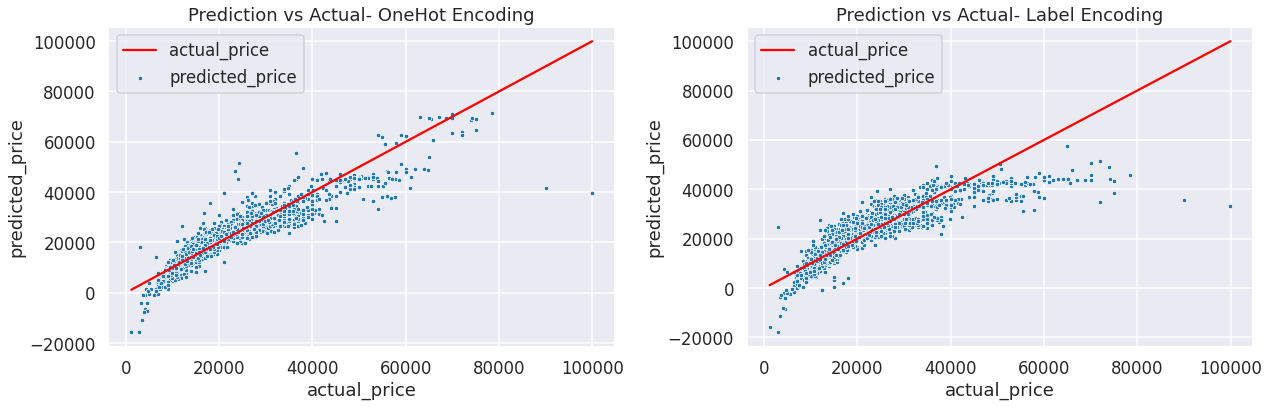

In [18]:
plt.figure(figsize = (18,6))
sns.set_style('darkgrid')
sns.set_context('talk')

plt.subplot(1,2,1)
sns.lineplot(x = 'actual', y = 'actual', data = actual_pred_OH, color = 'red', label = 'actual_price')
sns.scatterplot(x = 'actual', y = 'predicted', data = actual_pred_OH, marker = '.',label = 'predicted_price')
plt.legend()
plt.xlabel('actual_price')
plt.ylabel('predicted_price')
plt.title('Prediction vs Actual- OneHot Encoding')

plt.subplot(1,2,2)
sns.lineplot(x = 'actual', y = 'actual', data = actual_pred_LE, color = 'red', label = 'actual_price')
sns.scatterplot(x = 'actual', y = 'predicted', data = actual_pred_LE, marker = '.',label = 'predicted_price')
plt.legend()
plt.xlabel('actual_price')
plt.ylabel('predicted_price')
plt.title('Prediction vs Actual- Label Encoding')

plt.tight_layout()
plt.show()

#Observations:

* OneHot Encoding performed better than Label Encoding in all KPI's